# Notebook for Feature Engineering

## Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
from skimage import feature
import colorsys
import os
import random
from tqdm import tqdm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Feature Extraction

### RGB and HSV features
Use average and variance of 3 channels as features

In [20]:
# takes dataset and feature dictionaries as input
# gets the mean and variance of each hsv channel
def extract_rgb_features(img):
    channel_mean = img.mean(axis=(0,1))
    channel_var = img.var(axis=(0,1))
    return np.append(channel_mean, channel_var)

# takes dataset and feature dictionaries as input
# gets the mean and variance of each hsv channel
def extract_hsv_features(img):
    img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    channel_mean = img_convert.mean(axis=(0,1))
    channel_var = img_convert.var(axis=(0,1))
    return np.append(channel_mean, channel_var)


### HOG vector

In [21]:
def extract_grayscale_hog_features(
        img, 
        cell_size=(20,20),
        block_size=(20,20),
        block_stride=(20,20),
        num_bins=10):
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # hog = cv2.HOGDescriptor(img_gray.shape, block_size, block_stride, cell_size, num_bins)
    hog = feature.hog(img_gray, orientations=num_bins, pixels_per_cell=cell_size, cells_per_block=block_size)
    return hog

def extract_redchannel_hog_features(
        img, 
        cell_size=(20,20),
        block_size=(20,20),
        block_stride=(20,20),
        num_bins=10):
    
    img_red = img[:,:,2]
    hog = feature.hog(img_red, orientations=num_bins, pixels_per_cell=cell_size, cells_per_block=block_size)
    return hog

def extract_greenchannel_hog_features(
        img, 
        cell_size=(20,20),
        block_size=(20,20),
        block_stride=(20,20),
        num_bins=10):
    
    img_green = img[:,:,1]
    hog = feature.hog(img_green, orientations=num_bins, pixels_per_cell=cell_size, cells_per_block=block_size)
    return hog

def extract_bluechannel_hog_features(
        img, 
        cell_size=(20,20),
        block_size=(20,20),
        block_stride=(20,20),
        num_bins=10):
    
    img_blue = img[:,:,0]
    hog = feature.hog(img_blue, orientations=num_bins, pixels_per_cell=cell_size, cells_per_block=block_size)
    return hog

def extract_huechannel_hog_features(
        img, 
        cell_size=(20,20),
        block_size=(20,20),
        block_stride=(20,20),
        num_bins=10):
    
    img_hue = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,0]
    hog = feature.hog(img_hue, orientations=num_bins, pixels_per_cell=cell_size, cells_per_block=block_size)
    return hog

def extract_saturationchannel_hog_features(
        img, 
        cell_size=(20,20),
        block_size=(20,20),
        block_stride=(20,20),
        num_bins=10):
    
    img_sat = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,1]
    hog = feature.hog(img_sat, orientations=num_bins, pixels_per_cell=cell_size, cells_per_block=block_size)
    return hog

def extract_brightnesschannel_hog_features(
        img, 
        cell_size=(20,20),
        block_size=(20,20),
        block_stride=(20,20),
        num_bins=10):
    
    img_val = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,2]
    hog = feature.hog(img_val, orientations=num_bins, pixels_per_cell=cell_size, cells_per_block=block_size)
    return hog

### Dataset Load Function
Takes in list of feature functions and applies them within the load loop to save resources

In [23]:
# dataset info
def load_dataset(data_dir, feature_functions={}, cl_limit=30, img_limit=220):
    X = []
    Y = []
    idx_to_cl = {}
    features = []
    features_idxs = {}

    for i, cl in enumerate(os.listdir(data_dir)):
        if i >= cl_limit:
            break

        print(cl)
        idx_to_cl[i] = cl
        for j, fname in tqdm(enumerate(os.listdir(os.path.join(data_dir,cl)))):
            if j >= img_limit:
                break
            
            img = cv2.imread(os.path.join(data_dir, cl, fname))
            X.append(img)
            Y.append(i)

            feature = np.array([])
            for function_name in feature_functions.keys():
                start = len(feature)
                feature = np.append(feature, feature_functions[function_name](img))
                # start of feature is length before appending, end of feature is length -1 after appending
                features_idxs[function_name] = (start, len(feature) - 1)
            features.append(feature)
            
    return np.array(X), np.array(Y), idx_to_cl, np.array(features), features_idxs


In [24]:
X, Y, idx_to_cl, features, feature_start_idxs = load_dataset('data', feature_functions={
    'rgb':extract_rgb_features,
    'hsv':extract_hsv_features,
    'hog_gray':extract_grayscale_hog_features,
    'hog_red':extract_redchannel_hog_features,
    'hog_green':extract_greenchannel_hog_features,
    'hog_blue':extract_bluechannel_hog_features,
    'hog_hue':extract_huechannel_hog_features,
    'hog_sat':extract_saturationchannel_hog_features,
    'hog_bright':extract_brightnesschannel_hog_features
    })

Airport


100it [00:36,  2.74it/s]


BareLand


100it [00:37,  2.65it/s]


BaseballField


100it [00:36,  2.74it/s]


Beach


100it [00:41,  2.40it/s]


Bridge


100it [00:42,  2.38it/s]


Center


100it [00:42,  2.33it/s]


Church


100it [00:42,  2.35it/s]


Commercial


100it [00:43,  2.28it/s]


DenseResidential


100it [00:45,  2.20it/s]


Desert


100it [00:49,  2.02it/s]


Farmland


100it [00:41,  2.43it/s]


Forest


100it [00:42,  2.37it/s]


Industrial


100it [00:40,  2.44it/s]


Meadow


100it [00:40,  2.49it/s]


MediumResidential


100it [00:41,  2.41it/s]


Mountain


100it [00:39,  2.54it/s]


Park


100it [00:39,  2.51it/s]


Parking


100it [00:41,  2.42it/s]


Playground


100it [00:39,  2.52it/s]


Pond


100it [00:39,  2.56it/s]


Port


100it [00:37,  2.69it/s]


RailwayStation


100it [00:40,  2.44it/s]


Resort


100it [00:40,  2.47it/s]


River


100it [00:40,  2.48it/s]


School


100it [00:40,  2.44it/s]


SparseResidential


100it [00:41,  2.38it/s]


Square


100it [00:43,  2.30it/s]


Stadium


100it [00:40,  2.45it/s]


StorageTanks


100it [00:42,  2.38it/s]


Viaduct


100it [00:41,  2.38it/s]


MemoryError: Unable to allocate 75.7 GiB for an array with shape (3000, 3388012) and data type float64

### Train test split

In [12]:
print(X.shape)
print(Y.shape)
print(features.shape)

(6660, 600, 600, 3)
(6660,)
(6660, 9006)


In [28]:
# train test split
X_train, X_test, Y_train, Y_test, features_train, features_test = train_test_split(X, Y, features, test_size=0.2, stratify=Y, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
print(features_train.shape, features_test.shape)

(4662, 600, 600, 3) (1998, 600, 600, 3)
(4662,) (1998,)
(4662, 9006) (1998, 9006)


In [53]:
# features scaling
# scaler = MinMaxScaler()
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)

# PCA for features, use 95% explained variance for now
pca = PCA(n_components=0.95)
pca_features = features_train_scaled[:,6:]
print(pca_features.shape)
train_transformed = pca.fit_transform(pca_features)
print(train_transformed.shape)

features_test_scaled = scaler.transform(features_test)
test_transformed = pca.transform(features_test_scaled[:,6:])
print(test_transformed.shape)

(4662, 9000)
(4662, 2528)
(1998, 2528)


In [54]:
pca_features_train = np.append(features_train_scaled[:,:6], train_transformed, axis=1)
pca_features_test = np.append(features_test_scaled[:,:6], test_transformed, axis=1)
print(pca_features_train.shape)
print(pca_features_test.shape)

(4662, 2534)
(1998, 2534)


## Feature visualizations

### RGB and HSV histograms

In [6]:
def rgb_hist(rgb_imgs, y_labels, idx_to_cl, write_path='plots/histograms/'):
    labels = [idx_to_cl[idx] for idx in y_labels]

    # imgs are shape (n_images, 600, 600, 3)
    avgs = pd.DataFrame(np.mean(rgb_imgs, axis=(1,2)), columns=['Blue', 'Green', 'Red'])
    vars = pd.DataFrame(np.var(rgb_imgs, axis=(1,2)), columns=['Blue', 'Green', 'Red'])
    avgs['Class'] = labels
    vars['Class'] = labels

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
    for i,color in enumerate(['Blue', 'Green', 'Red']):
        sns.kdeplot(data=avgs, x=color, hue='Class', ax=axs[0,i])
        axs[0,i].set_title(f'Mean Value for {color} Channel')
        sns.kdeplot(data=vars, x=color, hue='Class', ax=axs[1,i])
        axs[0,i].set_title(f'Variance of {color} Channel')
    
    plt.savefig(write_path+'rgb_histograms.png')
    plt.show()
    
    return avgs, vars
    

SyntaxError: invalid syntax (1750113715.py, line 3)

In [ ]:
def hsv_hist(rgb_imgs, y_labels, idx_to_cl, write_path='plots/histograms/'):
    # convert bgr to hsv
    hsv_imgs = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in rgb_imgs])

    labels = [idx_to_cl[idx] for idx in y_labels]

    # imgs are shape (n_images, 600, 600, 3)
    avgs = pd.DataFrame(np.mean(hsv_imgs, axis=(1,2)), columns=['Hue', 'Saturation', 'Brightness'])
    vars = pd.DataFrame(np.var(hsv_imgs, axis=(1,2)), columns=['Hue', 'Saturation', 'Brightness'])
    avgs['Class'] = labels
    vars['Class'] = labels

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
    for i,color in enumerate(['Hue', 'Saturation', 'Brightness']):
        sns.kdeplot(data=avgs, x=color, hue='Class', ax=axs[0,i])
        axs[0,i].set_title(f'Mean Value for {color} Channel')
        sns.kdeplot(data=vars, x=color, hue='Class', ax=axs[1,i])
        axs[0,i].set_title(f'Variance of {color} Channel')
    
    plt.savefig(write_path+'hsv_histograms.png')
    plt.show()

    return avgs, vars

### HOG plots

In [ ]:
# generate 7 hog images, one for each rgb channel, hsv channel. and one grayscale 
def hog_plots(rgb_img, path='plots/hog/', prefix='sample'):
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2HSV) # shape: (600, 600, 3)
    grayscale_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY) # shape: (600, 600)

    # rgb hog plots
    for i, channel in enumerate(['blue','green','red']):
        (_, hog_img) = feature.hog(rgb_img[:,:,i], orientations=10, pixels_per_cell=(20,20), cells_per_block=(20,20),visualize=True)
        cv2.imwrite(f'{path}{prefix}_{channel}.jpg', hog_img*255)

    # hsv hog plots
    for i, channel in enumerate(['hue','saturation','brightness']):
        (_, hog_img) = feature.hog(hsv_img[:,:,i], orientations=10, pixels_per_cell=(20,20), cells_per_block=(20,20),visualize=True)
        cv2.imwrite(f'{path}{prefix}_{channel}.jpg', hog_img*255)

    # grayscale hog plot
    (_, hog_img) = feature.hog(grayscale_img, orientations=10, pixels_per_cell=(20,20), cells_per_block=(20,20),visualize=True)
    cv2.imwrite(f'{path}{prefix}_grayscale.jpg', hog_img*255)


### PCA line plot
PCA explained variance plot using a multitude of feature combinations

In [ ]:
# takes in list of np array features of shape (n_images, m_feature_length)
# plot explained variance for each feature, as well as an optional all features combined
def pca_plot(features_dict, max_components=500, include_all_features=True, path='plots/pca/'):
    df_pca = pd.DataFrame(columns=['n_components','explained_variance','feature'])
    for feature in features_dict.keys():
        pca = PCA()
        feature_pca = np.sort(pca.fit_transform(features_dict[feature]).explained_variance_ratio_)[::-1].cumsum()[:max_components]
        tmp = pd.DataFrame({
            'n_components':np.arange(1,len(feature_pca),1),
            'explained_variance':feature_pca,
            'feature':[feature for _ in range(len(feature_pca))]})
        df_pca = pd.concat(df_pca, tmp, axis=0)

    if include_all_features:
        all_features = np.hstack(list(features_dict.values()))
        pca = PCA()
        feature_pca = np.sort(pca.fit_transform(all_features).explained_variance_ratio_)[::-1].cumsum()[:max_components]
        tmp = pd.DataFrame({
            'n_components':np.arange(1,len(feature_pca),1),
            'explained_variance':feature_pca,
            'feature':'All features'})
        df_pca = pd.concat(df_pca, tmp, axis=0)

    fig, ax = plt.subplots(figsize=(20,12))
    sns.lineplot(data=df_pca, x='n_components', y='explained_variance', hue='feature', ax=ax)
    ax.set_xlabel('# of Components')
    ax.set_ylabel('Percent of Explained Variance')
    ax.set_title('PCA Explained Variance for Considered Features')
    fig.savefig(f'{path}explained_variance.png')

    return df_pca


## Model training

### Data partitioning

In [ ]:
# takes in the dataset, a list of features, and the start indices dictionary that was created during the data loading
# perform pca if param is set, will return pca if true, else will return None for that return slot
def subset_data(data, features, feature_idxs, transform_pca=False):
    subset = []
    for feature in features:
        subset.append(data[feature_idxs[feature][0]:feature_idxs[feature][1]+1])
    
    subset = np.hstack(subset)
    if transform_pca:
        pca = PCA()
        subset = pca.fit_transform(subset)
    else:
        pca = None
    
    return subset, pca

In [ ]:
subset_features = {
    'rgb_hsv':['rgb','hsv'],
    'hog':['hog_gray','hog_red','hog_green','hog_blue','hog_hue','hog_sat','hog_bright']
    # TODO: add rest of features
}

In [ ]:
rgb_hsv_train = subset_data(features_train, subset_features['rgb_hsv'], feature_idxs, transform_pca=False)
# ... and so on so forth for the other combinations of subsets

### Logistic regression
Use the subsetted training data to plug into the models

In [56]:
lr = LogisticRegression()
lr_params = {
    'penalty':['l1','l2'],
    'tol':[1e-5, 1e-4, 1e-3, 1e-2],
    'C':[0.2, 0.5, 1.0, 1.5, 2],
    'max_iter':[50,100,150,200]
}

lr_model = GridSearchCV(lr, lr_params)
lr_model.fit(pca_features_train, Y_train)
lr_model.score(pca_features_test, Y_test)

c:\Users\kdai1\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kdai1\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.4009009009009009

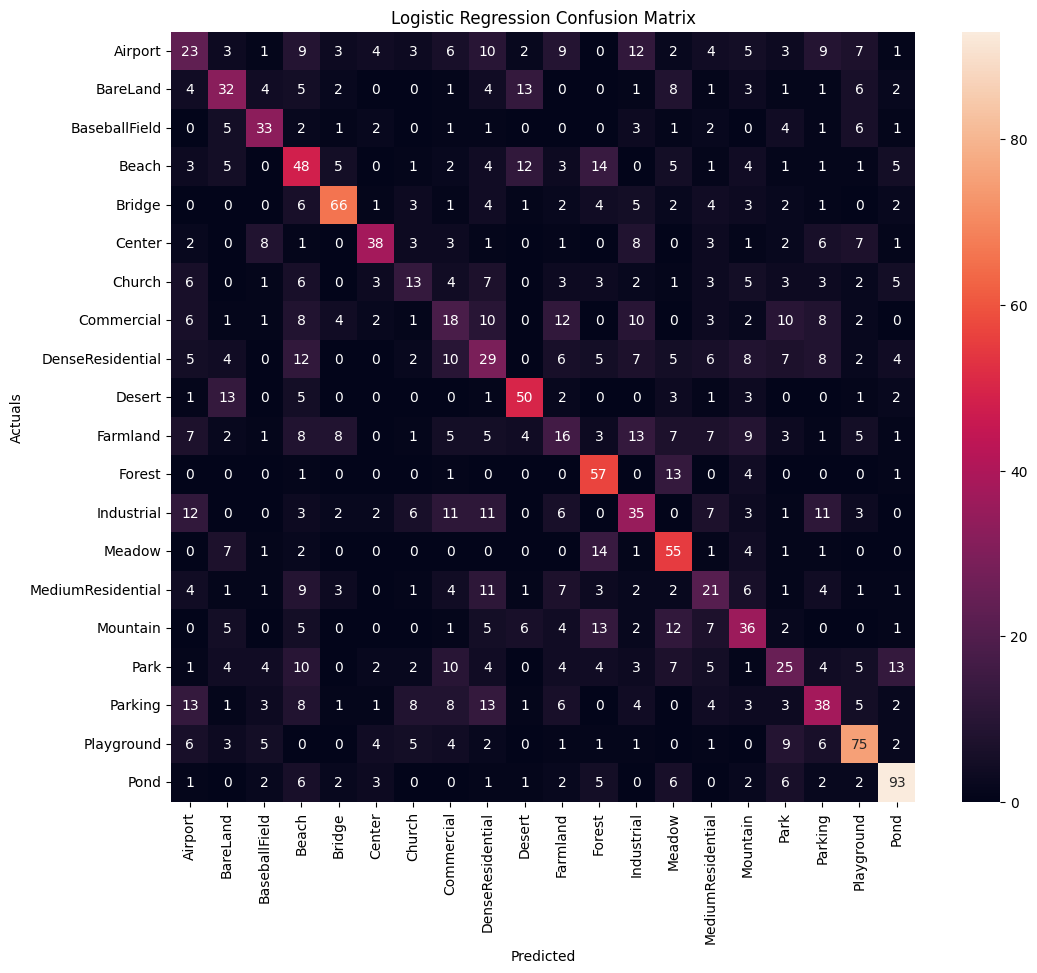

In [57]:
# deriving confusion matrix from Y prediction of test set
Y_pred = lr_model.predict(pca_features_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)
labels = [x for _, x in sorted(zip(idx_to_cl.keys(), idx_to_cl.values()))]
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# plotting confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(conf_df, annot=True)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()

### SVM

In [59]:
# svm = SVC()
# svm_params = {
#     'C':[0.2,0.5,1.0,2.0],
#     'kernel':['linear','poly','rbg','sigmoid'],
#     'degree':[3,5,7,9],
#     'tol':[1e-5, 1e-4, 1e-3, 1e-2]
# }
# svm_model = GridSearchCV(svm, svm_params)
svm_model = SVC()
svm_model.fit(pca_features_train, Y_train)
svm_model.score(pca_features_test, Y_test)

0.3733733733733734

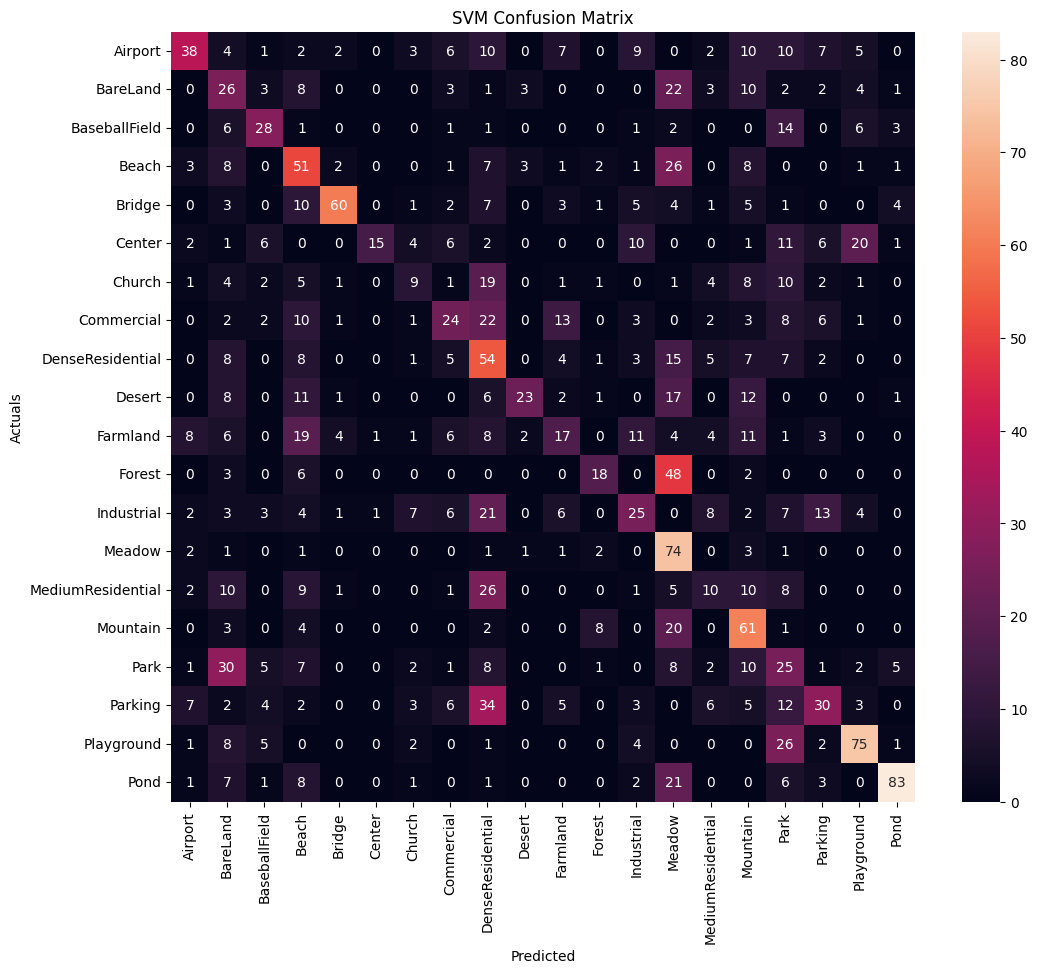

In [60]:
# deriving confusion matrix from Y prediction of test set
Y_pred = svm_model.predict(pca_features_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)
labels = [x for _, x in sorted(zip(idx_to_cl.keys(), idx_to_cl.values()))]
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# plotting confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(conf_df, annot=True)
plt.title('SVM Confusion Matrix')
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()